In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, input):
    result = [row[input] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)
    
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data , 2)
    sales_data = get_column(data , 3)
    
    X = [ tv_data , radio_data , newspaper_data ]
    y = sales_data
    
    return X, y

In [2]:
def initialize_params():
    w1 , w2 , w3 , b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344 , 0)
    return w1 , w2 , w3 , b

In [3]:
def predict(x1, x2, x3, w1, w2, w3, b) :
    result = x1*w1 + x2*w2 + x3*w3 + b
    return result

y_p = predict(x1 = 1, x2 =1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


In [4]:
def compute_loss_mse(y_hat, y) :
    loss = (y_hat - y)**2
    return loss

l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [5]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi 

g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [6]:
def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [7]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi

after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [8]:
def update_weight_b(b, dl_db, lr):    
    b = b - lr*dl_db
    return b

after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b) 

0.50001


In [9]:
def compute_loss_mae(y_hat, y):
    result = abs(y_hat-y)
    return result

l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [13]:

def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()
  N = len(y_data)

  for epoch in range(epoch_max):

      loss_total = 0.0
      dw1_total = 0.0
      dw2_total = 0.0
      dw3_total = 0.0
      db_total  = 0.0

      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output 
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)
          
          # compute loss 
          loss = compute_loss_mae(y, y_hat)
          loss_total = loss_total + loss

          # accumulate loss to total loss
          #your code here *****************************

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)
          
          # accumulate gradient w1, w2, w3, b
          dw1_total = dw1_total + dl_dw1
          dw2_total = dw2_total + dl_dw2
          dw3_total = dw3_total + dl_dw3
          db_total = db_total + dl_db

      # (after processing N samples) - update parameters
      w1 = update_weight_wi(w1, dl_dw1/N, lr)
      w2 = update_weight_wi(w2, dl_dw2/N, lr)
      w3 = update_weight_wi(w3, dl_dw3/N, lr)


      # logging
      losses.append(loss_total/N) 
  return (w1,w2,w3,b, losses)

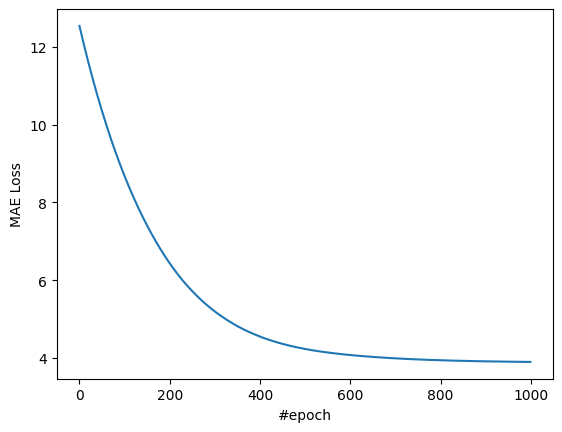

In [14]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [15]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
print(w1,w2,w3)

0.07865323031529436 0.00936309067354943 3.4293276428081508e-06
